In [813]:
import pandas as pd
import numpy as np
import os, math
import string
import matplotlib.pyplot as plt

In [814]:
path = 'data'
df = pd.read_csv(os.path.join(path, 'train_auto.csv'), delimiter=',')
df.set_index('INDEX', inplace=True)
df.head()

,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
INDEX,,,,,,,,,,,,,,,,,,,,,
1,0,0.0,0,60.0,0,11.0,"$67,349",No,$0,z_No,...,"$14,230",11,Minivan,yes,"$4,461",2,No,3,18.0,Highly Urban/ Urban
2,0,0.0,0,43.0,0,11.0,"$91,449",No,"$257,252",z_No,...,"$14,940",1,Minivan,yes,$0,0,No,0,1.0,Highly Urban/ Urban
4,0,0.0,0,35.0,1,10.0,"$16,039",No,"$124,191",Yes,...,"$4,010",4,z_SUV,no,"$38,690",2,No,3,10.0,Highly Urban/ Urban
5,0,0.0,0,51.0,0,14.0,NaN,No,"$306,251",Yes,...,"$15,440",7,Minivan,yes,$0,0,No,0,6.0,Highly Urban/ Urban
6,0,0.0,0,50.0,0,NaN,"$114,986",No,"$243,925",Yes,...,"$18,000",1,z_SUV,no,"$19,217",2,Yes,3,17.0,Highly Urban/ Urban


# Data Exploration

### First Cleaning

In [815]:
def cleaning(df):
    discrete_vars = []
    continuous_vars = []

    df['EDUCATION'] = df['EDUCATION'].apply(lambda x: x.replace('<','INF_'))
    df['URBANICITY'] = df['URBANICITY'].apply(lambda x: x.replace('/',''))

    dollar_columns = ['INCOME', 'HOME_VAL', 'BLUEBOOK', 'OLDCLAIM']
    for elem in dollar_columns:
        df[elem] = df[elem].astype('str')
        df[elem] = df[elem].apply(lambda x: x.replace('$', '').replace(',',''))
        df[elem] = df[elem].astype('float')

    for c in df.columns:
        if df[c].dtype == 'O':
            discrete_vars.append(c)
            df[c] = df[c].astype('category')
        else:
            continuous_vars.append(c)

    for elem in discrete_vars:
        df[elem] = df[elem].apply(lambda x: x.replace(' ', '_'))

    continuous_vars.remove('TARGET_FLAG')
    return df

df = cleaning(df)

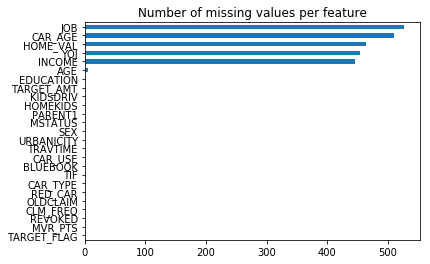

In [816]:
df_na = df.isna().sum().to_frame()
df_na.columns = ['count_nan']
df_na[['count_nan']].sort_values("count_nan").plot.barh(title='Number of missing values per feature', legend=False)

In [817]:
df_na['perc_nan'] = df_na['count_nan'].apply(lambda x: round((x/df.shape[0])*100,2))
print("There is at best {}% missing data given a feature on our dataset".format(max(df_na['perc_nan'])))

There is at best 6.45% missing data given a feature on our dataset


As, the missing data ratio is relatively small, we can think later of doing imputation 

In [818]:
# Global Statistics for each feature
for c in df.columns:
    print(df[c].describe(include='all'))
    print('\n')

count    8161.000000
mean        0.263816
std         0.440728
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: TARGET_FLAG, dtype: float64


count      8161.000000
mean       1504.324648
std        4704.026930
min           0.000000
25%           0.000000
50%           0.000000
75%        1036.000000
max      107586.136160
Name: TARGET_AMT, dtype: float64


count    8161.000000
mean        0.171057
std         0.511534
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.000000
Name: KIDSDRIV, dtype: float64


count    8155.000000
mean       44.790313
std         8.627589
min        16.000000
25%        39.000000
50%        45.000000
75%        51.000000
max        81.000000
Name: AGE, dtype: float64


count    8161.000000
mean        0.721235
std         1.116323
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         5.000000
Name: HOMEKI

### Frequency analysis

In [819]:
def ax_range(n, x, y):
    cpt = 0
    for i in range(y):
        for j in range(x):
            if cpt != n:
                cpt+=1
            else:
                return (i,j)

Discrete variables

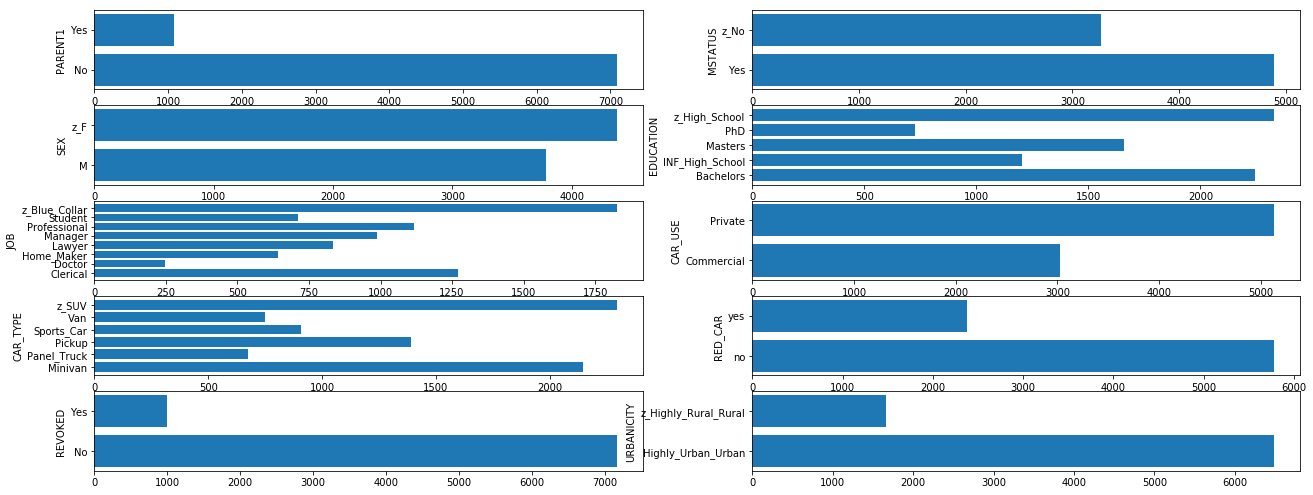

In [820]:
num_x = 2
num_y = 5

fig, axes = plt.subplots(num_y, num_x, figsize=(10,8))
for i, c in enumerate(df[discrete_vars].columns):
    y,x = ax_range(i, num_x, num_y)
    vals = df[c].value_counts().values
    inds = df[c].value_counts().index
    axes[y,x].barh(inds, vals)
    axes[y,x].set_ylabel(c)
plt.subplots_adjust(bottom=0.1, right=1.8, top=0.9)
plt.show()

Continuous Variables

In [821]:
"""
#utiliser pd.cut !!
num_x = 2
num_y = 7
fig, axes = plt.subplots(num_y, num_x, figsize=(10,8))
for i, c in enumerate(df[continuous_vars].columns):
    y,x = ax_range(i, num_x, num_y)
    vals = df[c].value_counts().values
    inds = df[c].value_counts().index
    axes[y,x].barh(inds, vals)
    axes[y,x].set_ylabel(c)
    
plt.subplots_adjust(bottom=0.1, right=1.8, top=0.9)
plt.show()
"""

'\n#utiliser pd.cut !!\nnum_x = 2\nnum_y = 7\nfig, axes = plt.subplots(num_y, num_x, figsize=(10,8))\nfor i, c in enumerate(df[continuous_vars].columns):\n    y,x = ax_range(i, num_x, num_y)\n    vals = df[c].value_counts().values\n    inds = df[c].value_counts().index\n    axes[y,x].barh(inds, vals)\n    axes[y,x].set_ylabel(c)\n    \nplt.subplots_adjust(bottom=0.1, right=1.8, top=0.9)\nplt.show()\n'

### Simple Pearson Correlations Analysis
Between continuous variables only

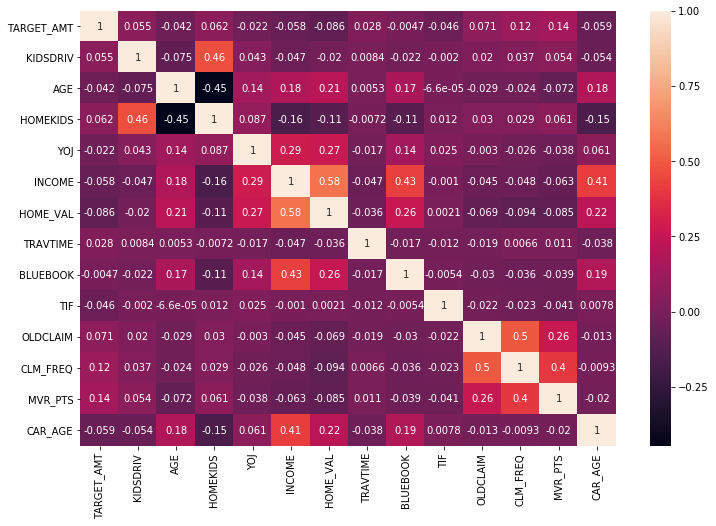

In [822]:
import scipy.stats as ss
from scipy.stats import pearsonr
import seaborn as sns

correlation_mat = df[continuous_vars].corr()
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(correlation_mat, annot = True)
#sns.heatmap(correlation_mat, annot = True)
plt.show()

### Data Imputation
Instead of deleting each row containing missing data, we impute missing values with either the most frequent label (categorical) or the mean value (numerical)

In [823]:
def intersect(lst1, lst2):
    lst3 = []
    for e1 in lst1:
        if e1 in lst2:
            lst3.append(e1)
    return lst3

In [824]:
from sklearn.impute import SimpleImputer

def imputed(df):
    has_na = df.isna().any()
    mask = has_na == True
    imp_cols = list(has_na[mask].index)
    print(imp_cols)

    imp_cols_disc = intersect(discrete_vars, imp_cols)
    imp_cols_cont = intersect(continuous_vars, imp_cols)
    
    df2 = df.copy(deep=True)
    imp = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
    for col in imp_cols_disc:
        data = imp.fit_transform(df2[[col]])
        df2[col] = data
        
    imp = SimpleImputer(missing_values=np.nan, strategy="mean")
    if 'TARGET_AMT' in imp_cols_cont:
        imp_cols_cont.remove('TARGET_AMT')
    for col in imp_cols_cont:
        data = imp.fit_transform(df2[[col]])
        df2[col] = data
        
    return df2

df2 = imputed(df)

['AGE', 'YOJ', 'INCOME', 'HOME_VAL', 'JOB', 'CAR_AGE']


Impute categorical data with most_frequent label

Impute numerical data with mean

### One-Hot Encoding
For Categorical Variables

In [825]:
from sklearn.preprocessing import OneHotEncoder

def onehotencoding(df2):
    df3 = df2.copy(deep=True)

    for col in discrete_vars:
        # creating instance of one-hot-encoder
        enc = OneHotEncoder(handle_unknown='error')

        enc_df = pd.DataFrame(enc.fit_transform(df3[[col]]).toarray())
        #Keep the index ordering
        enc_df.set_index(df3.index, inplace=True)
        str_names = [str(col + '_' + str(i)) for i,c in enumerate(list(np.unique(df3[col])))]
        enc_df.columns = str_names
        # merge 
        df3 = df3.join(enc_df)
        df3.drop(col, axis=1, inplace=True)
    return df3

df3 = onehotencoding(df2)

## Data split

In [826]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, f1_score

#Shuffle data
df3 = df3.sample(frac=1)
train = df3[:int(df3.shape[0]*0.80)]
test = df3[int(df3.shape[0]*0.80):]

y_train = train['TARGET_FLAG']
X_train = train.drop(columns=['TARGET_FLAG', 'TARGET_AMT'], axis=1)

y_test = test['TARGET_FLAG']
X_test = test.drop(columns=['TARGET_FLAG', 'TARGET_AMT'], axis=1)

y_test = np.array(y_test).reshape(-1,1)

## Training Full Model

Baseline : If we always predict TARGET_FLAG = 0 (not a car crash) we got 73% accuracy

In [827]:
#arr, count = np.unique(y_test, return_counts=True)
#print((arr, count))
y_dum = np.zeros(y_test.shape, dtype=int)

auc = roc_auc_score(y_test, y_dum)

print("Accuracy: {}%".format(round(accuracy_score(y_test, y_dum)*100, 2)))

print('ROC AUC score:', auc)

print('Confusion matrix\n', confusion_matrix(y_test, y_dum))

Accuracy: 74.16%
ROC AUC score: 0.5
Confusion matrix
 [[1211    0]
 [ 422    0]]


Logistic Regression : A Linear Model for Binary Classification

In [828]:
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

score2 = logreg.score(X_test, y_test)
print(score2)

auc = roc_auc_score(y_test, y_pred)
print('ROC AUC score:', auc)

print('F1-score: {}%'.format(round(f1_score(y_test, y_pred)*100, 2)))
print('Confusion matrix\n', confusion_matrix(y_test, y_pred))

0.6999387630128597
ROC AUC score: 0.6857547911913306
F1-score: 53.07%
Confusion matrix
 [[866 345]
 [145 277]]


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


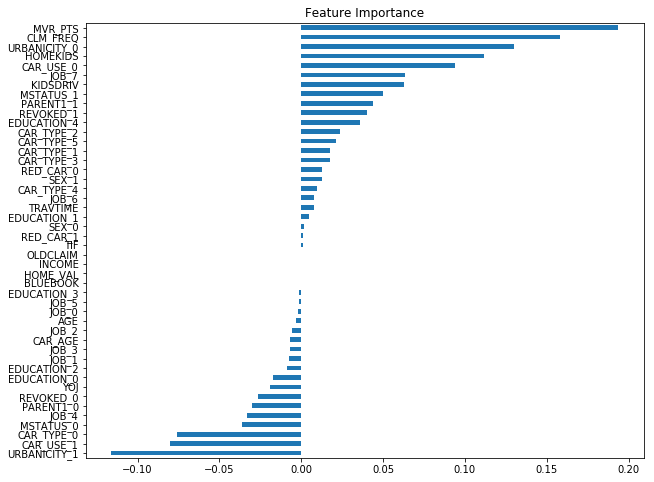

In [829]:
# get coeffs importance
importance = logreg.coef_

dico = {}
for col, v in zip(X_train.columns, importance[0]):
    dico[col] = v

df_importance = pd.DataFrame.from_dict(dico, orient='index')
df_importance.columns = ['Importance']
df_importance.sort_values(by='Importance', ascending=False, inplace=True)
#df_importance.head(15)

df_importance.sort_values('Importance').plot.barh(title='Feature Importance', legend=False, figsize=(10,8))

## Training Partial Model
Remove the unimportant features and use a K-Fold data strategy to reduce overfitting

In [830]:
df_importance2 = df_importance.reset_index()
df_importance2.rename(columns={'index':'Features'}, inplace=True)
mask = (df_importance2['Importance'] >= 0.0)
important_cols = df_importance2[mask]['Features']

In [831]:
X_train = X_train[important_cols]
X_test = X_test[important_cols]

pred_test_full =0
cv_score =[]
f1_scores = []
accuracy_scores = []
models = []
i=1
skf = StratifiedKFold(n_splits=5)


for train_index, test_index in skf.split(X_train, y_train):
    print('{} of KFold {}'.format(i, skf.n_splits))
    
    xtr, xvl = X_train.iloc[train_index], X_train.iloc[test_index]
    ytr, yvl = y_train.iloc[train_index], y_train.iloc[test_index]
    
    #model
    logreg = LogisticRegression(class_weight='balanced', C=2, solver='liblinear')
    logreg.fit(xtr, ytr)
    score = roc_auc_score(yvl, logreg.predict(xvl))
    f1 = f1_score(yvl, logreg.predict(xvl))
    accuracy = accuracy_score(yvl, logreg.predict(xvl))
    
    print('ROC AUC score:',score)
    print('F1-score:', f1)
    print('\n')
    cv_score.append(score)
    f1_scores.append(f1)
    accuracy_scores.append(accuracy)
    models.append(logreg)
    
    pred_test = logreg.predict_proba(X_test)[:,1]
    pred_test_full += pred_test
    i+=1
    
print("pred_test_full:", pred_test_full)
print("Averaged CV score: {}%".format(round((sum(cv_score)/len(cv_score))*100,2)))
print('Averaged F1-score: {}%'.format(round(sum(f1_scores)/len(f1_scores)*100, 2)))
print("Averaged accuracy: {}%".format(round(sum(accuracy_scores)/len(accuracy_scores)*100, 2)))

1 of KFold 5
ROC AUC score: 0.7413754803073968
F1-score: 0.6002239641657334


2 of KFold 5
ROC AUC score: 0.7063794556840078
F1-score: 0.5618247298919568


3 of KFold 5
ROC AUC score: 0.7204262026315948
F1-score: 0.5762711864406779


4 of KFold 5
ROC AUC score: 0.7207094938730735
F1-score: 0.5762331838565021


5 of KFold 5
ROC AUC score: 0.7163290277082945
F1-score: 0.5720823798627003


pred_test_full: [0.98114384 1.3927865  0.62921261 ... 2.47224905 0.85656333 3.34416341]
Averaged CV score: 72.1%
Averaged F1-score: 57.73%
Averaged accuracy: 71.68%


## Conclusion

In summary, we get a F1-Score (Precision and Recall) of approximately 57% and a AUC (Area Under roc Curve) of 72% on the test data, averaged over the 5 batch of our Stratified-KFold training strategy.

We could have done a GridSearch to tune the parameters of the Logistic Regression algorithm given our data to increase the metrics used. <br/>

Our model is slightly less accurate (~71.8%) compared to the baseline (~73%).

## Inference

In [832]:
test_auto = pd.read_csv(os.path.join(path, 'test_auto.csv'), delimiter=',')
test_auto.set_index('INDEX', inplace=True)
test_auto.head()

,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
INDEX,,,,,,,,,,,,,,,,,,,,,
3,NaN,NaN,0,48.0,0,11.0,"$52,881",No,$0,z_No,...,"$21,970",1,Van,yes,$0,0,No,2,10.0,Highly Urban/ Urban
9,NaN,NaN,1,40.0,1,11.0,"$50,815",Yes,$0,z_No,...,"$18,930",6,Minivan,no,"$3,295",1,No,2,1.0,Highly Urban/ Urban
10,NaN,NaN,0,44.0,2,12.0,"$43,486",Yes,$0,z_No,...,"$5,900",10,z_SUV,no,$0,0,No,0,10.0,z_Highly Rural/ Rural
18,NaN,NaN,0,35.0,2,NaN,"$21,204",Yes,$0,z_No,...,"$9,230",6,Pickup,no,$0,0,Yes,0,4.0,z_Highly Rural/ Rural
21,NaN,NaN,0,59.0,0,12.0,"$87,460",No,$0,z_No,...,"$15,420",1,Minivan,yes,"$44,857",2,No,4,1.0,Highly Urban/ Urban


In [833]:
best_model_index = cv_score.index(max(cv_score))
best_model = models[best_model_index]

df_test = cleaning(test_auto)
df_test = imputed(df_test)
df_test = onehotencoding(df_test)

y_test = df_test['TARGET_FLAG']
X_test = df_test.drop(columns=['TARGET_FLAG', 'TARGET_AMT'], axis=1)
X_test = X_test[important_cols]

y_pred = best_model.predict(X_test)
test_auto["TARGET_FLAG"] = y_pred

['TARGET_FLAG', 'TARGET_AMT', 'AGE', 'YOJ', 'INCOME', 'HOME_VAL', 'JOB', 'CAR_AGE']


In [834]:
test_auto.to_csv("predicted_target_flag.csv", encoding='utf-8')